# Training set/ Test Set


In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import random

In [13]:
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

#test set
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([3, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')


logits = tf.matmul(X, W) + b

hypothesis = tf.nn.softmax(logits)

#cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y)
#cost = tf.reduce_mean(cost_i)
cost = tf.reduce_sum(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))


optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

predicted = tf.argmax(hypothesis, 1)
correct = tf.equal(predicted, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32)) * 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        print(step, cost_val,'\n', W_val,'\n')
            
    #test
    pre, cor, acc = sess.run([predicted, correct, accuracy], feed_dict = {X: x_test, Y: y_test})
    print("predicted : {}, correct : {}, accuracy : {}%".format(pre, cor, acc))
    
        

0 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382765 -0.17868096]] 

1 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382765 -0.17868096]] 

2 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382765 -0.17868096]] 

3 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382765 -0.17868096]] 

4 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382765 -0.17868096]] 

5 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382766 -0.17868096]] 

6 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711  0.04619971]
 [-0.19427149 -0.00382766 -0.17868096]] 

7 18.7399 
 [[-0.44544506 -1.31700337 -1.22627711]
 [-0.94417137 -0.00191711

# Non-normalized inputs
- need nomalization/ regularization

## 데이터 안에 비정상적으로 큰 수가 있는경우

case1) Not normalized

In [18]:
xy = np.array([[828.6559973, 833.450012, 908100, 828.349976, 831.659973],
             [823.02002, 828, 1828100, 821, 828],
             [819, 824, 1438100, 818, 824],
             [816, 820, 1008100, 815, 819],
             [819, 823, 1188100, 818, 818],
             [819, 823, 1198100, 816, 820],
             [811, 815, 1098100, 809, 812],
             [809, 816, 1398100, 804, 809]])

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([4,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, optimizer], feed_dict ={X: x_data, Y: y_data})
        print(step, "\ncost : {} \n prediction : \n {}".format(cost_val, hy_val))

0 
cost : 341156626432.0 
 prediction : 
 [[ 412584.3125 ]
 [ 830547.8125 ]
 [ 653367.4375 ]
 [ 458015.15625]
 [ 539790.8125 ]
 [ 544333.6875 ]
 [ 498902.65625]
 [ 635193.1875 ]]
1 
cost : 3.748221310979095e+32 
 prediction : 
 [[ -1.36566409e+16]
 [ -2.74922188e+16]
 [ -2.16271382e+16]
 [ -1.51605076e+16]
 [ -1.78674688e+16]
 [ -1.80178560e+16]
 [ -1.65139882e+16]
 [ -2.10255915e+16]]
2 
cost : inf 
 prediction : 
 [[  4.52667826e+26]
 [  9.11266722e+26]
 [  7.16860619e+26]
 [  5.02515540e+26]
 [  5.92241388e+26]
 [  5.97226178e+26]
 [  5.47378464e+26]
 [  6.96921533e+26]]
3 
cost : inf 
 prediction : 
 [[ -1.50042852e+37]
 [ -3.02051652e+37]
 [ -2.37613119e+37]
 [ -1.66565537e+37]
 [ -1.96306394e+37]
 [ -1.97958663e+37]
 [ -1.81435966e+37]
 [ -2.31004045e+37]]
4 
cost : inf 
 prediction : 
 [[ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]]
5 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
6 
cost : nan 
 prediction : 
 [[ n

case2) normalized

In [25]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[-0.48587437 -0.48586511  1.26725949 -0.48587496 -0.48586857]
 [-0.48588526 -0.48587564  3.04498913 -0.48588917 -0.48587564]
 [-0.48589303 -0.48588337  2.29138635 -0.48589496 -0.48588337]
 [-0.48589883 -0.4858911   1.46049097 -0.48590076 -0.48589303]
 [-0.48589303 -0.4858853   1.80830764 -0.48589496 -0.48589496]
 [-0.48589303 -0.4858853   1.82763079 -0.48589883 -0.4858911 ]
 [-0.48590849 -0.48590076  1.63439931 -0.48591236 -0.48590656]
 [-0.48591236 -0.48589883  2.21409376 -0.48592202 -0.48591236]]
0 
cost : 4.239101409912109 
 prediction : 
 [[-1.92185903]
 [-3.42994452]
 [-2.79065275]
 [-2.08579183]
 [-2.38084793]
 [-2.39724326]
 [-2.23332715]
 [-2.72510195]]
1 
cost : 3.331533432006836 
 prediction : 
 [[-1.74821842]
 [-3.10903645]
 [-2.53217268]
 [-1.89614248]
 [-2.16238594]
 [-2.17718029]
 [-2.02927065]
 [-2.47302365]]
2 
cost : 2.6184580326080322 
 prediction : 
 [[-1.59432173]
 [-2.82456279]
 [-2.30305147]
 [-1.7280513 ]
 [-1.96874738]
 [-1.98212266]
 [-1.84840536]
 [-2.2495784

# MNIST Dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch : 0001 cost = 2.939964186
Epoch : 0002 cost = 1.119215973
Epoch : 0003 cost = 0.879598928
Epoch : 0004 cost = 0.767953227
Epoch : 0005 cost = 0.699873232
Epoch : 0006 cost = 0.651347581
Epoch : 0007 cost = 0.615556447
Epoch : 0008 cost = 0.587002616
Epoch : 0009 cost = 0.563427508
Epoch : 0010 cost = 0.543312057
Epoch : 0011 cost = 0.526284417
Epoch : 0012 cost = 0.511082243
Epoch : 0013 cost = 0.497872189
Epoch : 0014 cost = 0.485937646
Epoch : 0015 cost = 0.474964216
Accuracy :  0.8879
Label : [6]
prediction: [6]


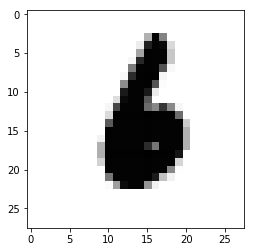

In [46]:
from tensorflow.examples.tutorials.mnist import input_data
#one hot 인코딩 처리 안해도 불러올때 자동으로 onehot 처리 가능
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis =1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#parameter
# 데이터가 많기 때문에 한꺼번에 학습시키지 않고 몇개로 나누어서 학습시킨다. 
# epoch  : 전체 데이터를 한번 학습시키면 1 epoch라고 한다. 
# 전체 데이터에서 몇개로 나누면 batch_size
# 만약 1000개의 데이터샘플에서 batch_size 가 500일경우 1 epoch를 완료하는데에 iteration은 2번이 필요하다.
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print("Epoch : {:04d} cost = {:.9f}".format(epoch+1, avg_cost))
    #accuracy report
    #sess.run없이 돌리는 방법       
    print("Accuracy : ", accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label :", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()